In [1]:
import pandas as pd
import geopandas as gpd
pop = gpd.read_file('읍면동별_인구데이터.geojson')
dong = gpd.read_file('6.광양시_법정경계(읍면동).geojson')
pop
dong

/opt/app-root/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


,emd_cd,emd_nm,geometry
0,46230101,황금동,"MULTIPOLYGON (((127.63862 34.90079, 127.63853 ..."
1,46230102,황길동,"MULTIPOLYGON (((127.65677 34.90432, 127.65668 ..."
2,46230103,도이동,"MULTIPOLYGON (((127.65683 34.90166, 127.64961 ..."
3,46230104,성황동,"MULTIPOLYGON (((127.69770 34.96499, 127.69838 ..."
4,46230105,중군동,"MULTIPOLYGON (((127.70136 34.96870, 127.70085 ..."
5,46230106,중동,"MULTIPOLYGON (((127.70152 34.93301, 127.70152 ..."
6,46230107,마동,"MULTIPOLYGON (((127.71218 34.93809, 127.71222 ..."
7,46230108,광영동,"MULTIPOLYGON (((127.72656 34.95173, 127.72655 ..."
8,46230109,태인동,"MULTIPOLYGON (((127.73980 34.94862, 127.73999 ..."
9,46230110,금호동,"MULTIPOLYGON (((127.73849 34.90808, 127.73814 ..."


In [3]:
pop_df = pd.DataFrame(pop.groupby("emd_nm")["val"].sum()).reset_index()
pop_df

,emd_nm,val
0,광양읍,47941.0
1,광영동,12425.0
2,금호동,12308.0
3,다압면,1101.0
4,도이동,529.0
5,마동,17844.0
6,봉강면,1657.0
7,성황동,216.0
8,옥곡면,2257.0
9,옥룡면,2097.0


In [5]:
dong_pop = pd.merge(pop_df,dong,on="emd_nm",how = "left")

In [6]:
dong_pop

,emd_nm,val,emd_cd,geometry
0,광양읍,47941.0,46230250,"MULTIPOLYGON (((127.59663 34.89492, 127.59600 ..."
1,광영동,12425.0,46230108,"MULTIPOLYGON (((127.72656 34.95173, 127.72655 ..."
2,금호동,12308.0,46230110,"MULTIPOLYGON (((127.73849 34.90808, 127.73814 ..."
3,다압면,1101.0,46230360,"MULTIPOLYGON (((127.64117 35.16850, 127.64139 ..."
4,도이동,529.0,46230103,"MULTIPOLYGON (((127.65683 34.90166, 127.64961 ..."
5,마동,17844.0,46230107,"MULTIPOLYGON (((127.71218 34.93809, 127.71222 ..."
6,봉강면,1657.0,46230310,"MULTIPOLYGON (((127.58052 35.10889, 127.58066 ..."
7,성황동,216.0,46230104,"MULTIPOLYGON (((127.69770 34.96499, 127.69838 ..."
8,옥곡면,2257.0,46230330,"MULTIPOLYGON (((127.64878 35.03547, 127.64902 ..."
9,옥룡면,2097.0,46230320,"MULTIPOLYGON (((127.59919 35.11969, 127.59997 ..."


### 20년도 동별 인구 막대그래프

In [12]:
import matplotlib
import platform
# Window 
if platform.system() == 'Windows': 
    matplotlib.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Darwin': # Mac 
    matplotlib.rc('font', family='AppleGothic') 
else: #linux 
    matplotlib.rc('font', family='NanumGothic') 
# 그래프에 마이너스 표시가 되도록 변경 
matplotlib.rcParams['axes.unicode_minus'] = False


#### 인구 수 별 정렬

In [64]:
sort_dong_pop=dong_pop.sort_values("val",ascending=False)
sort_dong_pop

,emd_nm,val,emd_cd,geometry
0,광양읍,47941.0,46230250,"MULTIPOLYGON (((127.59663 34.89492, 127.59600 ..."
11,중동,42885.0,46230106,"MULTIPOLYGON (((127.70152 34.93301, 127.70152 ..."
5,마동,17844.0,46230107,"MULTIPOLYGON (((127.71218 34.93809, 127.71222 ..."
1,광영동,12425.0,46230108,"MULTIPOLYGON (((127.72656 34.95173, 127.72655 ..."
2,금호동,12308.0,46230110,"MULTIPOLYGON (((127.73849 34.90808, 127.73814 ..."
8,옥곡면,2257.0,46230330,"MULTIPOLYGON (((127.64878 35.03547, 127.64902 ..."
13,진월면,2234.0,46230350,"MULTIPOLYGON (((127.75999 34.96293, 127.75994 ..."
12,진상면,2098.0,46230340,"MULTIPOLYGON (((127.65639 35.11680, 127.65698 ..."
9,옥룡면,2097.0,46230320,"MULTIPOLYGON (((127.59919 35.11969, 127.59997 ..."
14,태인동,1684.0,46230109,"MULTIPOLYGON (((127.73980 34.94862, 127.73999 ..."


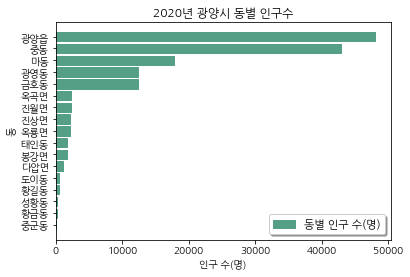

In [62]:
import matplotlib.pyplot as plt
import numpy as np

plt.barh(sort_dong_pop["emd_nm"],
         sort_dong_pop["val"],
         align="center",
         edgecolor = "#569F87",
         color="#569F87",label="동별 인구 수(명)")
plt.legend(loc="lower right",fontsize=11,frameon=True,shadow=True)
plt.xlabel('인구 수(명)')
plt.ylabel('동')
plt.title("2020년 광양시 동별 인구수")
plt.show()